In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("twitter_training.csv", names=['ID', 'Topic', 'Sentiment', 'Tweet'], header=None,)
cols=['ID', 'Topic', 'Sentiment', 'Text']

In [ ]:
df.head()

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.head(20)

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [ ]:
df.tail(20)

,ID,Topic,Sentiment,Tweet
74662,9197,Nvidia,Neutral,Nvidia therefore doesn ’ t want to give up its...
74663,9197,Nvidia,Neutral,is doesn’t should I give up its password ‘cryp...
74664,9198,Nvidia,Negative,Nvidia really delayed the 3070 2 weeks .
74665,9198,Nvidia,Negative,Nvidia really delayed the 3070 by 2 weeks.
74666,9198,Nvidia,Negative,Nvidia did delay by 3070 2 weeks.
74667,9198,Nvidia,Negative,Nvidia really delayed the 3070 several weeks.
74668,9198,Nvidia,Negative,Nvidia really only delayed the 3070 2 flight w...
74669,9198,Nvidia,Negative,Nvidia really delayed the next 2 weeks.
74670,9199,Nvidia,Positive,Let no elim go unnoticed. . . . NVIDIA Highlig...
74671,9199,Nvidia,Positive,t let Elim go unnoticed.... NVIDIA Highlights ...


In [ ]:
df.columns

Index(['ID', 'Topic', 'Sentiment', 'Tweet'], dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=74682, step=1)

In [ ]:
df.shape

(74682, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [ ]:
df.describe(include=object)

,Topic,Sentiment,Tweet
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [ ]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [ ]:
df.isna().sum()

ID             0
Topic          0
Sentiment      0
Tweet        686
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

ID           0
Topic        0
Sentiment    0
Tweet        0
dtype: int64

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

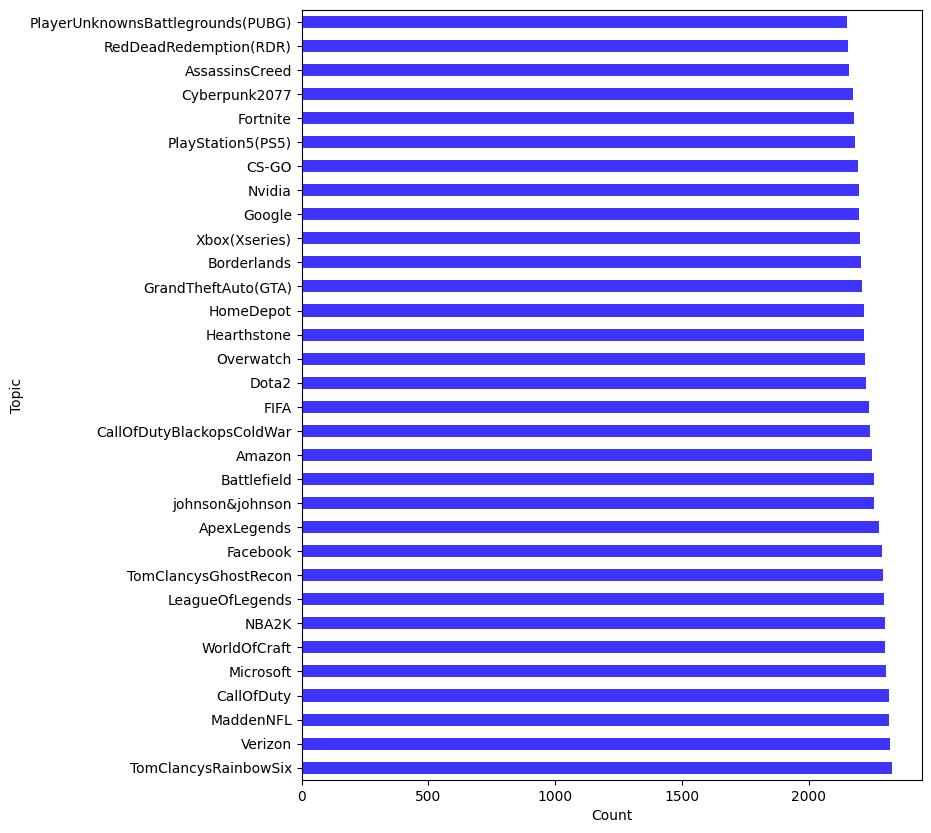

In [ ]:
plt.figure(figsize=(8,10))
df['Topic'].value_counts().plot(kind='barh',color='#3F33FF')
plt.xlabel("Count")
plt.show()

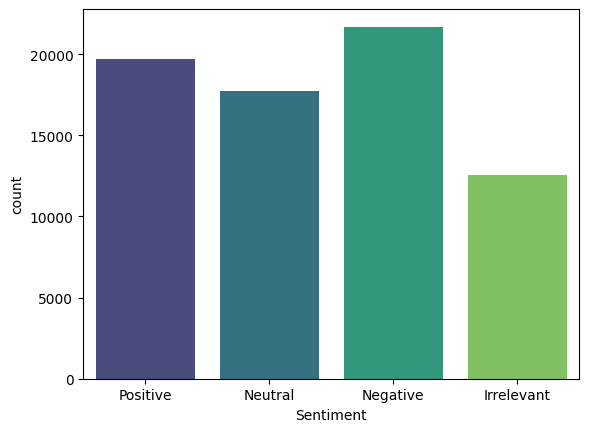

In [ ]:
sns.countplot(x = 'Sentiment',data=df,palette='viridis')
plt.show()

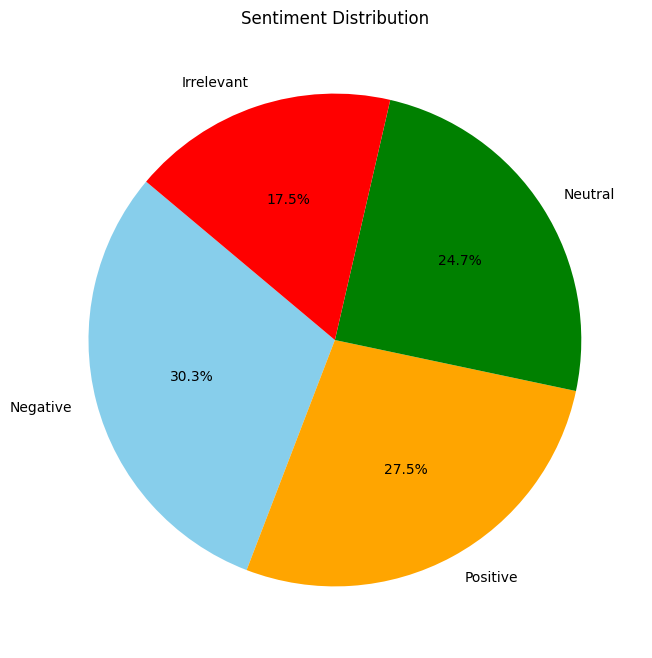

In [ ]:
# Calculate the counts for each sentiment for pie chart
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Sentiment Distribution')
plt.show()

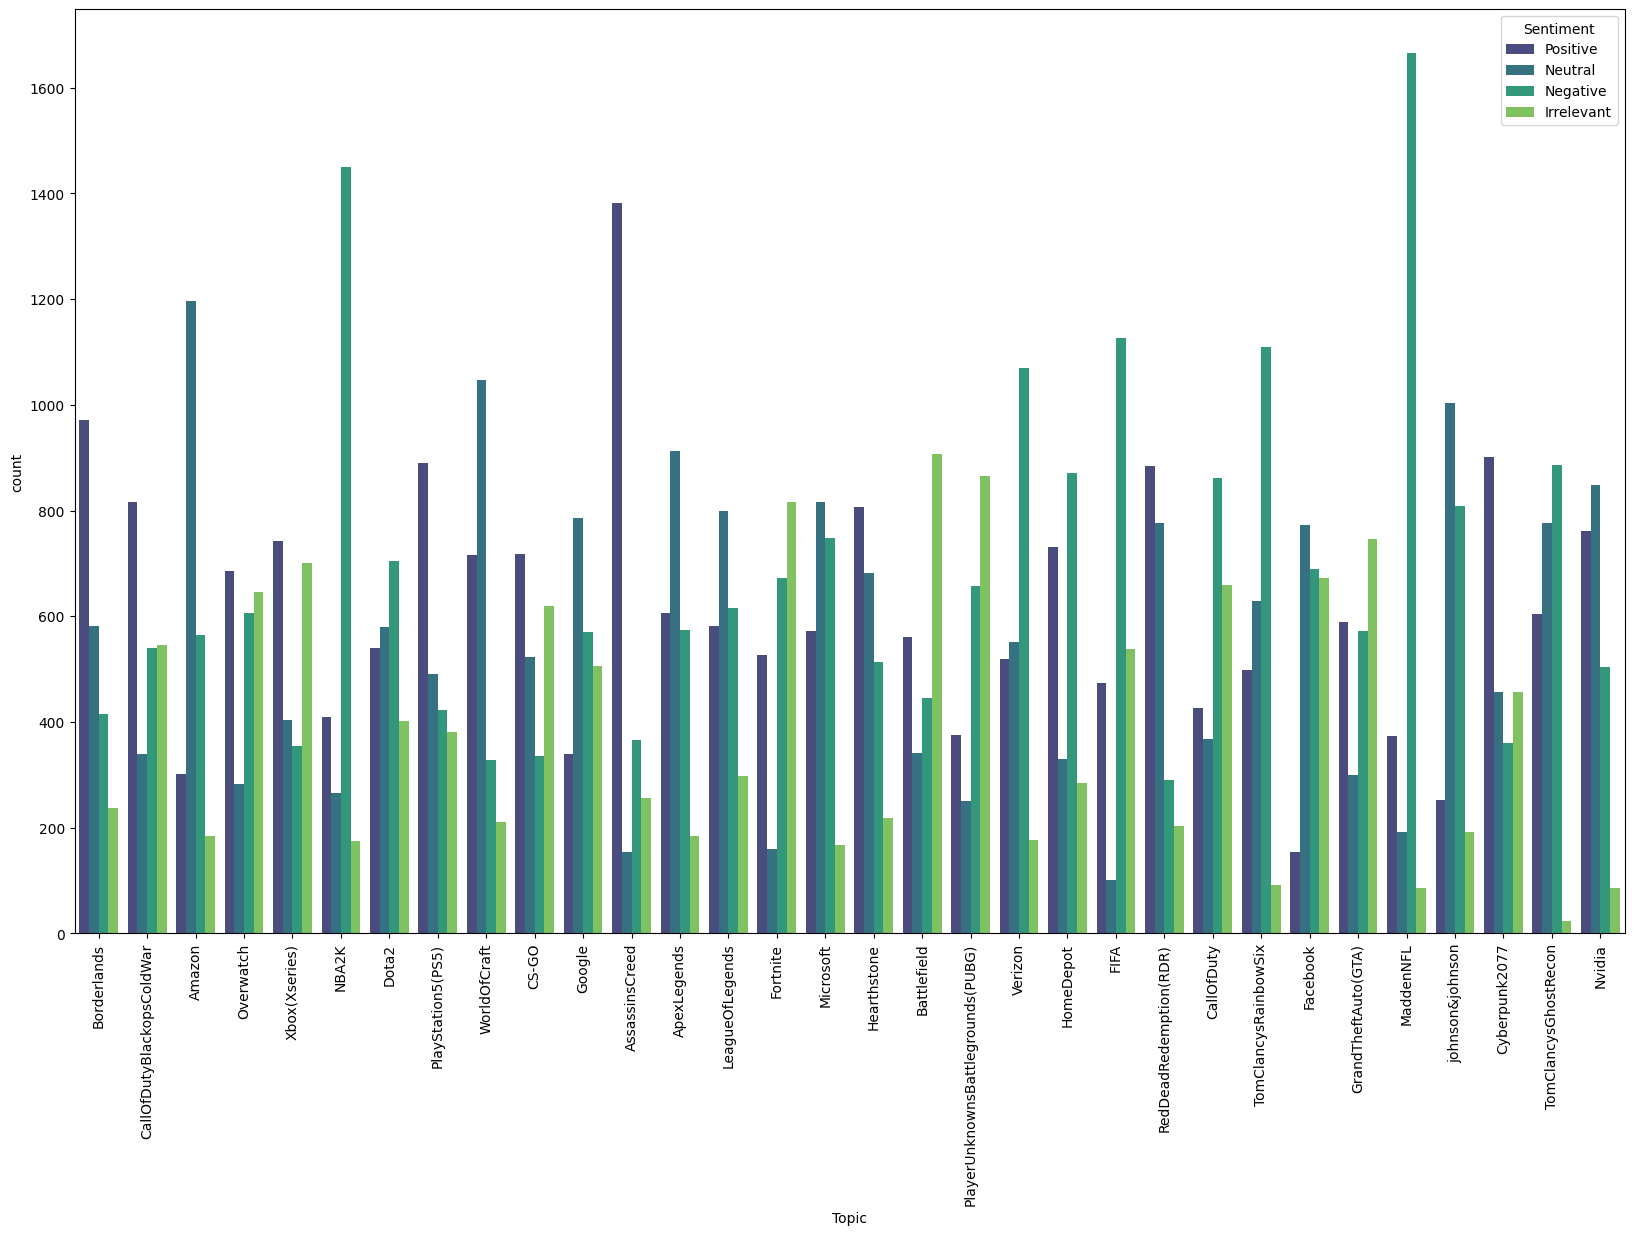

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=df,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

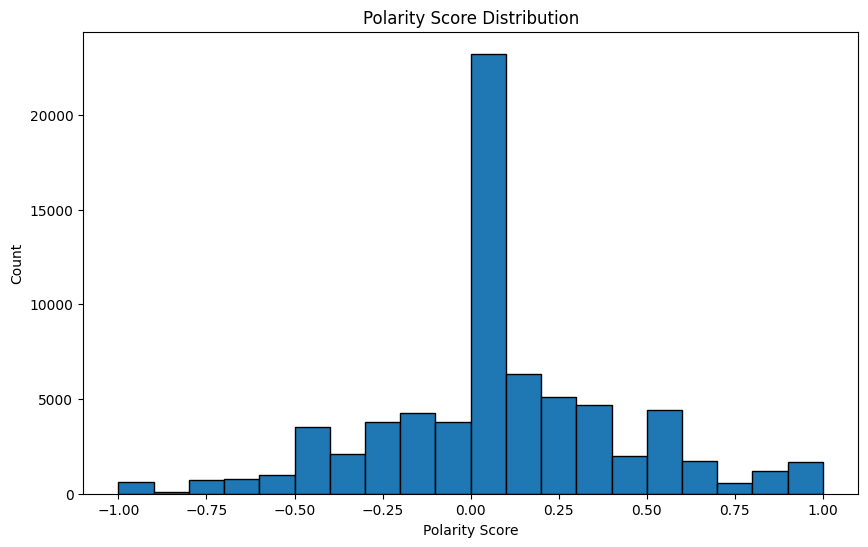

In [ ]:
def analyze_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0.0
# Calculate polarity
df['Polarity'] = df['Tweet'].apply(analyze_sentiment)
df['Sentiment_Label'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
plt.figure(figsize=(10, 6))
plt.hist(df['Polarity'], bins=20, edgecolor='k')
plt.title('Polarity Score Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.show()

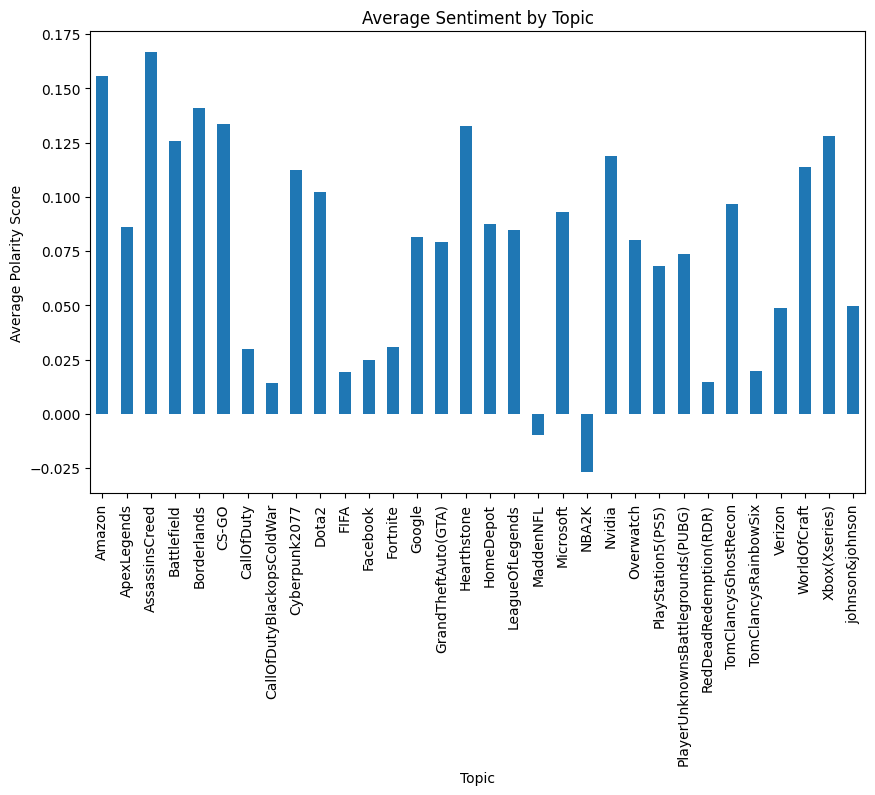

In [ ]:
plt.figure(figsize=(10, 6))
average_polarity_by_topic = df.groupby('Topic')['Polarity'].mean()
average_polarity_by_topic.plot(kind='bar')
plt.title('Average Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Polarity Score')
plt.show()

In [ ]:
# Group by Topic and Sentiment
topic_wise_sentiment = df.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')
# Top 5 Topics
topic_counts = df['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

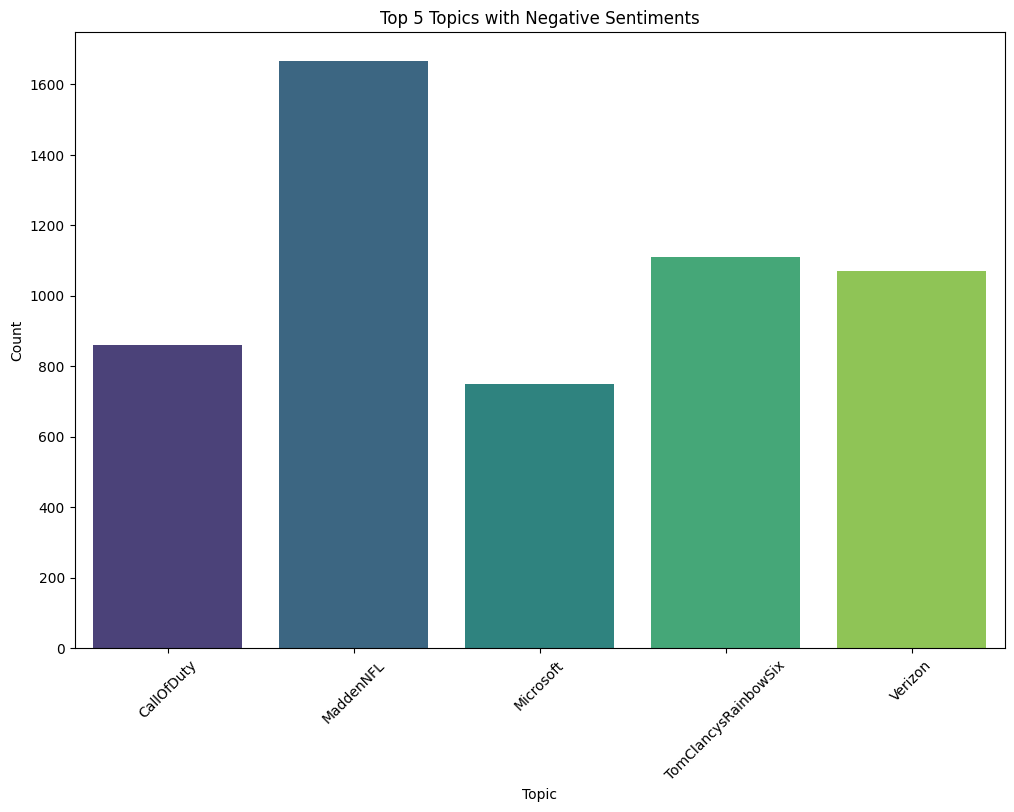

In [ ]:
# top negative dentiments
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

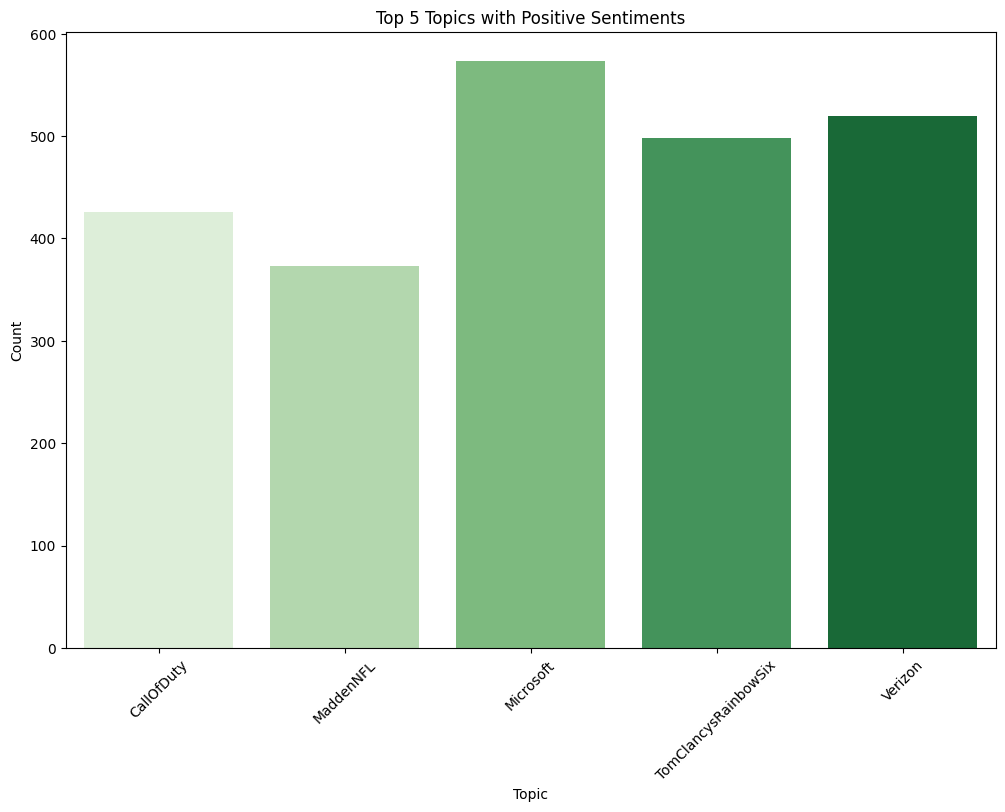

In [ ]:
# ton positive sentiments
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Greens')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

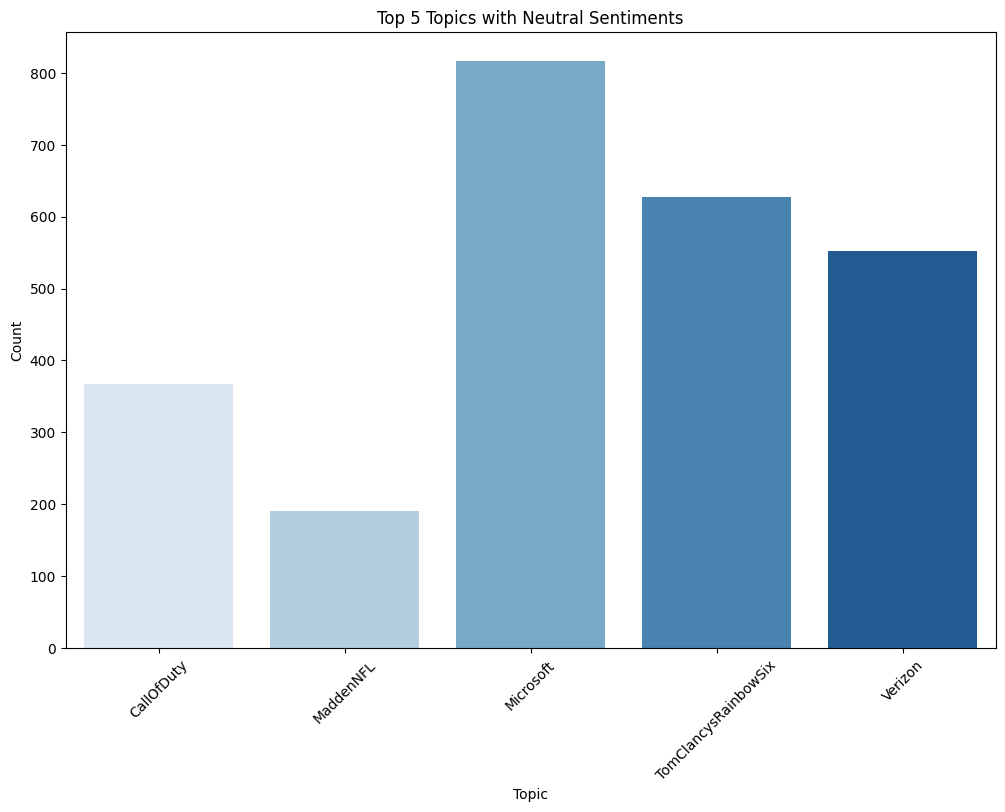

In [ ]:
# top neutral sentiments
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

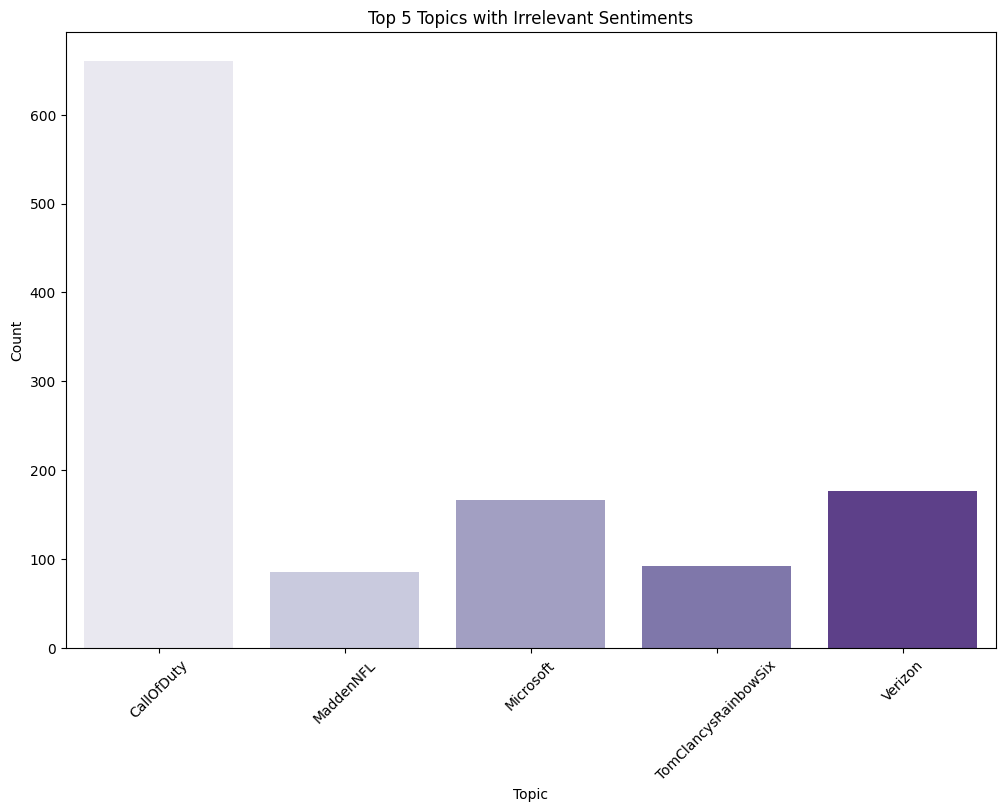

In [ ]:
# top Irrelevant Sentiments
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

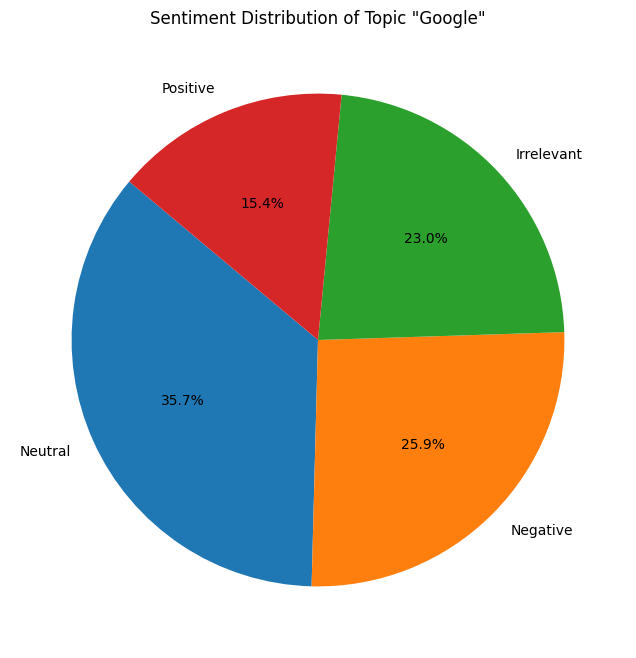

In [ ]:
# entries related to the topic 'Google'
google_data = df[df['Topic'] == 'Google']
sentiment_counts = google_data['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

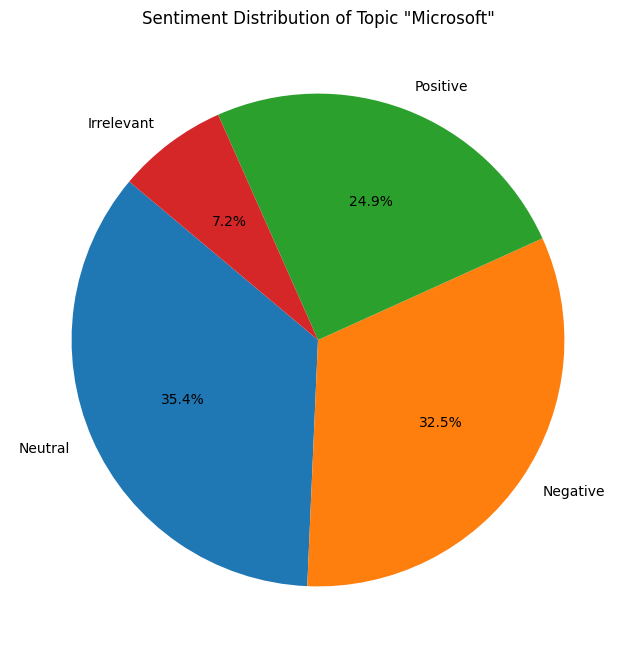

In [ ]:
# entries related to the topic 'Microsoft'
ms_data = df[df['Topic'] == 'Microsoft']
sentiment_counts = ms_data['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

Column 'Text' not found in DataFrame. Please check the column name.


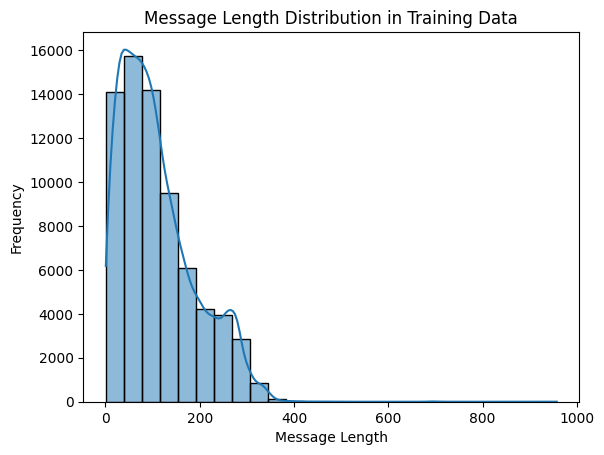

In [ ]:
#Message Length Distribution in Training Data
if 'Text' in df.columns:
    df['msg_len'] = df['Text'].apply(len)
else:
    print("Column 'Text' not found in DataFrame. Please check the column name.")
    correct_column_name = 'Tweet'
    df['msg_len'] = df[correct_column_name].apply(len)
sns.histplot(df['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

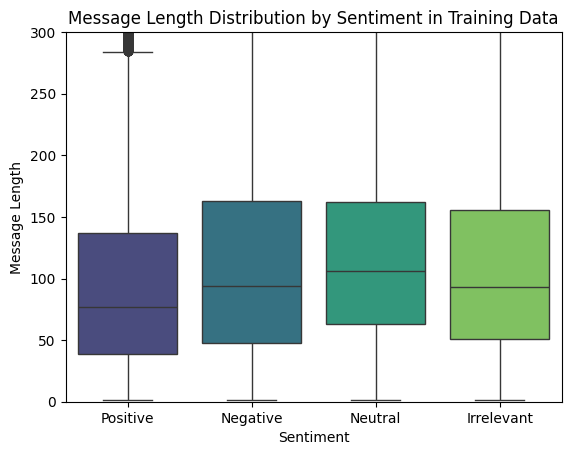

In [ ]:
sns.boxplot(data=df, x=df['Sentiment'], y='msg_len', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show()

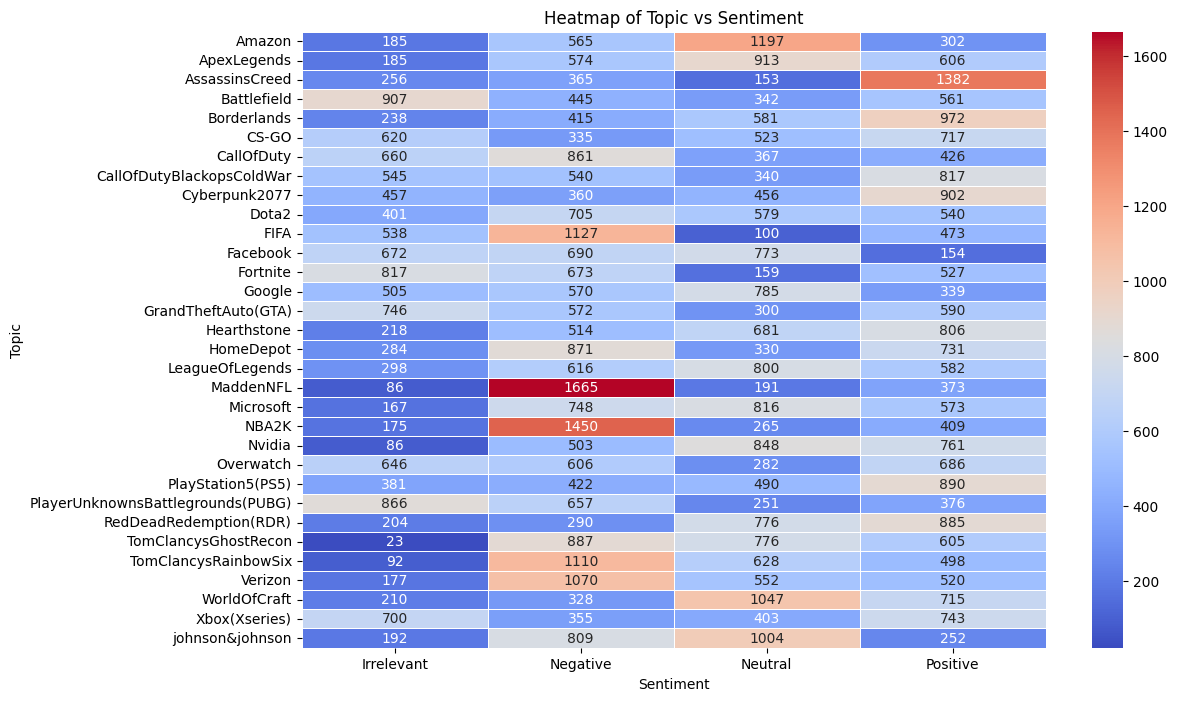

In [ ]:
# Heatmap of Topic vs Sentiment
crosstab = pd.crosstab(index=df['Topic'], columns=df['Sentiment'])
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()

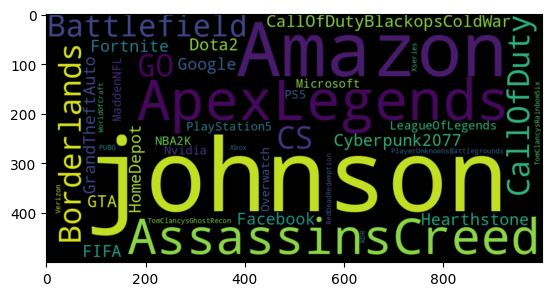

In [ ]:
topic_list = ' '.join(crosstab.index)
wc = WordCloud(width=1000, height=500).generate(topic_list)
plt.imshow(wc, interpolation='bilinear')

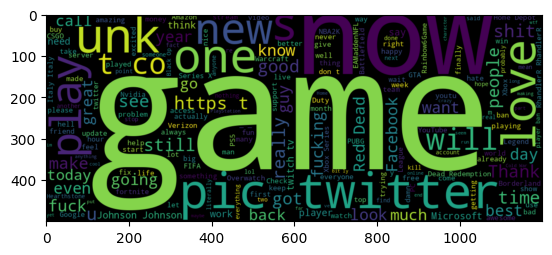

In [ ]:
if 'Text' in df.columns:
    corpus = ' '.join(df['Text'])
elif 'Tweet' in df.columns:
    corpus = ' '.join(df['Tweet'])
else:
    print("Neither 'Text' nor 'Tweet' column found. Please check the DataFrame.")
    corpus = ''
wc2 = WordCloud(width=1200, height=500).generate(corpus)
plt.imshow(wc2, interpolation='bilinear')